In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
import pickle
import json

In [2]:
df = pd.read_csv("Bengaluru_House_Data.csv", sep = ",")
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [3]:
df.shape

(13320, 9)

In [4]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [5]:
df.groupby("area_type")["area_type"].agg("count")

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

Drop unnecesary columns and columns with high null values

In [7]:
df2 = df.drop(["area_type", "availability", "society"], axis = 1)
df2.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [8]:
df2.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [9]:
df2["balcony"] = df2["balcony"].fillna(df2["balcony"].mode().iloc[0]).astype(int)
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [10]:
df3.groupby("balcony")["balcony"].agg("count")

balcony
0    1029
1    4897
2    5648
3    1672
Name: balcony, dtype: int64

In [11]:
df3["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [12]:
df3["bhk"] = df3["size"].apply(lambda x: int(x.split()[0]))

C:\Users\mprad\AppData\Local\Temp\ipykernel_10280\3400472361.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["bhk"] = df3["size"].apply(lambda x: int(x.split()[0]))


In [13]:
df3.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,1,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1,95.00,3
4,Kothanur,2 BHK,1200,2.0,1,51.00,2


In [14]:
df3["bhk"].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [15]:
df3[df3.bhk>20]

,location,size,total_sqft,bath,balcony,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,0,660.0,43


In [16]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [17]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [18]:
df3[~df3["total_sqft"].apply(is_float)].head(10)

,location,size,total_sqft,bath,balcony,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,2,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,0,445.000,4


In [19]:
def convert_sqft_to_num(x):
    tokens = x.split("-")
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1])) / 2
    try:
        return float(x)
    except:
        return None

In [20]:
df4 = df3.copy()
df4["total_sqft"] = df4["total_sqft"].apply(convert_sqft_to_num)
df4.head(5)

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,1,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,1,51.00,2


In [21]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
balcony               0
price             186.0
bhk                   4
Name: 30, dtype: object

In [22]:
df5 = df4.copy()
df5["per_sqft"] = df5["price"] * 100000 / df5["total_sqft"]
df5.head()

,location,size,total_sqft,bath,balcony,price,bhk,per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1,51.00,2,4250.000000


In [23]:
len(df5.location.unique())

1304

In [24]:
df5.location = df5.location.apply(lambda x: x.strip())
loc_stat = df5.groupby("location")["location"].agg("count").sort_values(ascending=False)
loc_stat

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [25]:
len(loc_stat[loc_stat <=10])

1052

In [26]:
loc_less10 = loc_stat[loc_stat <=10]
loc_less10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [27]:
len(df5.location.unique())

1293

In [28]:
df5.location = df5.location.apply(lambda x: "other" if x in loc_less10 else x)
len(df5.location.unique())

242

In [29]:
df5[df5.total_sqft/df5.bhk<300].head()

,location,size,total_sqft,bath,balcony,price,bhk,per_sqft
9,other,6 Bedroom,1020.0,6.0,2,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,2,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,1,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,2,100.0,3,20000.000000


In [30]:
df5.shape

(13246, 8)

In [31]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12502, 8)

In [32]:
df6.per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: per_sqft, dtype: float64

In [33]:
def remove_ps_out(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby("location"):
        m = np.mean(subdf.per_sqft)
        st = np.std(subdf.per_sqft)
        reduced_df = subdf[(subdf.per_sqft > (m-st)) & (subdf.per_sqft <= (m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index = True)
    return df_out
df7 = remove_ps_out(df6)
df7.shape

(10241, 8)

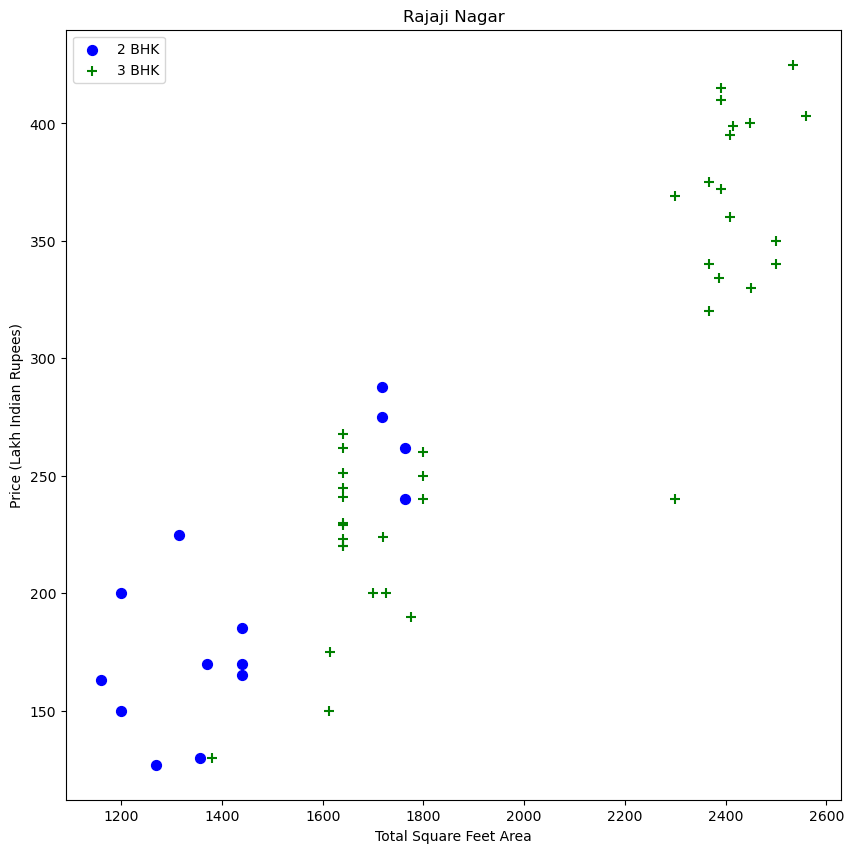

In [34]:
def plot_2b_3b(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    plt.figure(figsize = (10,10))
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_2b_3b(df7,"Rajaji Nagar")

In [35]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.per_sqft),
                'std': np.std(bhk_df.per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
df8.shape

(7329, 8)

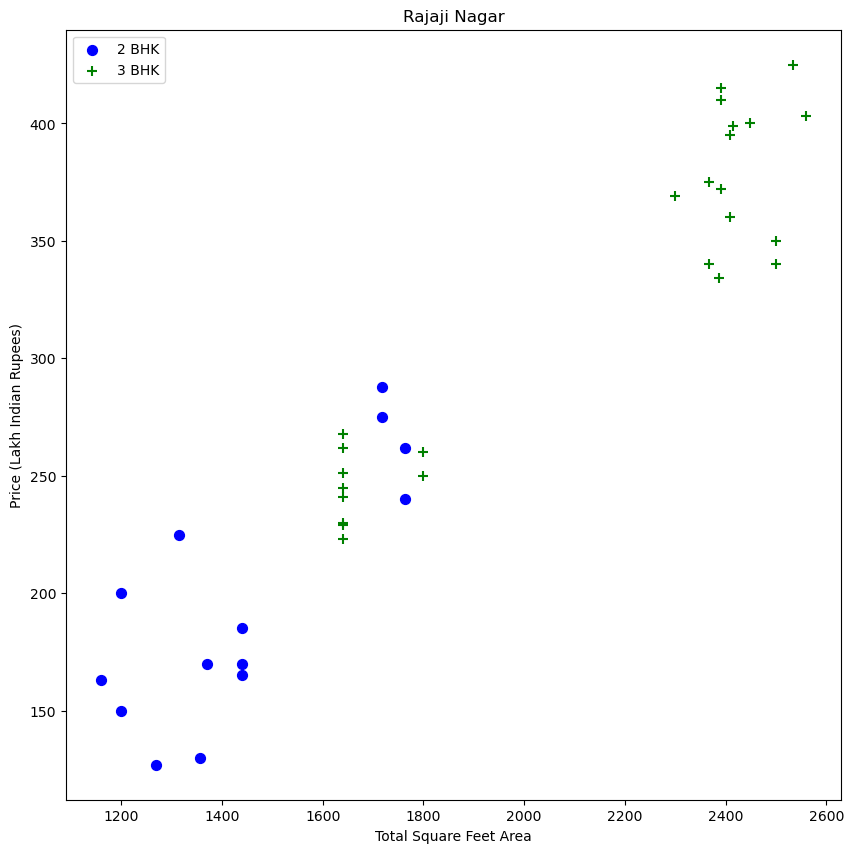

In [36]:
plot_2b_3b(df8,"Rajaji Nagar")

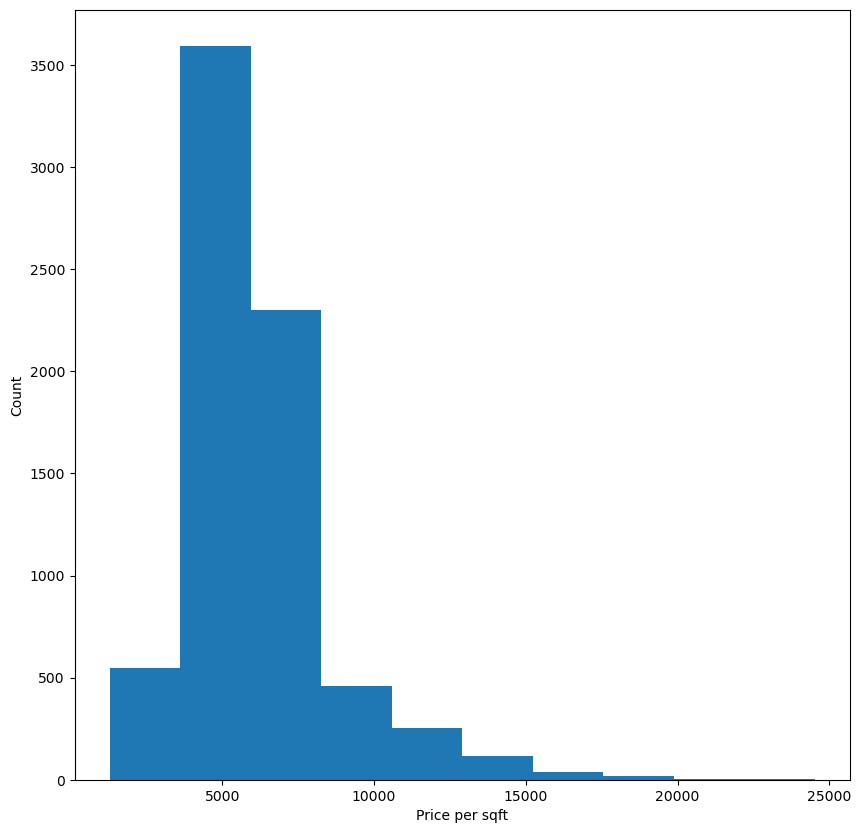

In [37]:
plt.figure(figsize = (10,10))
plt.hist(df8.per_sqft)
plt.xlabel("Price per sqft")
plt.ylabel("Count");

In [38]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [39]:
df8[df8.bath>10]

,location,size,total_sqft,bath,balcony,price,bhk,per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,2,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,2,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,2,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,2,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,0,275.0,13,5069.124424


In [40]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,balcony,price,bhk,per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,2,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,2,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,2,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1,1000.0,6,8819.897689


In [41]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7251, 8)

In [42]:
df10 = df9.drop(['size','per_sqft'],axis='columns')
df10.head(3)

,location,total_sqft,bath,balcony,price,bhk
0,1st Block Jayanagar,2850.0,4.0,1,428.0,4
1,1st Block Jayanagar,1630.0,3.0,2,194.0,3
2,1st Block Jayanagar,1875.0,2.0,3,235.0,3


In [43]:
dummies = pd.get_dummies(df10.location).astype(int)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
df11 = pd.concat([df10, dummies.drop("other", axis= 1)], axis = 1)
df11.head()

,location,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,1,428.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,2,194.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,3,235.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,0,130.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,2,148.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
df12 = df11.drop("location", axis = 1)
df12.head()

,total_sqft,bath,balcony,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
x = df12.drop("price", axis = "columns")
y = df12.price
x.head()

,total_sqft,bath,balcony,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,2,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=17)
clf = LinearRegression()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
clf.score(x_test, y_test)

0.7995209198723365

In [48]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), x, y, cv=cv)

array([0.82419865, 0.77168673, 0.85094863, 0.80844803, 0.83582874])

In [49]:
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['squared_error','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x,y)

,model,best_score,best_params
0,linear_regression,0.818222,{}
1,lasso,0.687374,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision_tree,0.702341,"{'criterion': 'squared_error', 'splitter': 'be..."


In [50]:
def predict_price(location,sqft,bath,bal,bhk):    
    loc_index = np.where(x.columns==location)[0][0]

    d = np.zeros(len(x.columns))
    d[0] = sqft
    d[1] = bath
    d[2] = bal
    d[3] = bhk
    if loc_index >= 0:
        d[loc_index] = 1

    return clf.predict([d])[0]

In [51]:
predict_price('1st Phase JP Nagar',1000, 2, 1, 2)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


90.32615124682414

In [52]:
predict_price('1st Phase JP Nagar',1000, 3, 1, 2)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


95.5037204431269

In [53]:
predict_price('Indira Nagar',1000, 2, 1, 2)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


194.22785256954302

In [54]:
predict_price('Indira Nagar',1000, 3, 1, 3)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


197.3457748534908

In [111]:
with open("banglore_home_price_model.pickle", "wb") as f:
    pickle.dump(clf, f)

In [117]:
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

In [119]:
df12.bhk.unique()

array([ 4,  3,  2,  5,  1,  6,  8,  7,  9, 11, 16, 10, 13], dtype=int64)

In [121]:
df12.bath.unique()

array([ 4.,  3.,  2.,  5.,  1.,  6.,  8.,  7.,  9., 16., 12., 13.])

In [123]:
df12.balcony.unique()

array([1, 2, 3, 0])

In [ ]:
df12.balcony.unique()